<a href="https://colab.research.google.com/github/BahodirML/Coding_Practices/blob/main/Airtickets_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

#In this project the task is to create a model which can predict the price of airtickets

In [4]:
df = pd.read_csv('/content/train_data.csv')
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21.0,7212.0
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7.0,5292.0
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5.0,60553.0
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28.0,5760.0
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4.0,10712.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12823,12824,AirAsia,I5-1518,Hyderabad,Evening,one,Late_Night,Mumbai,Economy,4.83,19.0,2250.0
12824,12825,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Delhi,Economy,33.83,28.0,7476.0
12825,12826,AirAsia,I5-740,Delhi,Early_Morning,one,Afternoon,Hyderabad,Economy,7.58,15.0,2050.0
12826,12827,Air_India,AI-764,Delhi,Evening,one,Night,Chennai,Business,28.42,36.0,47657.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12828 entries, 0 to 12827
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                12828 non-null  int64  
 1   airline           12828 non-null  object 
 2   flight            12827 non-null  object 
 3   source_city       12827 non-null  object 
 4   departure_time    12827 non-null  object 
 5   stops             12827 non-null  object 
 6   arrival_time      12827 non-null  object 
 7   destination_city  12827 non-null  object 
 8   class             12827 non-null  object 
 9   duration          12827 non-null  float64
 10  days_left         12827 non-null  float64
 11  price             12827 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


#First of all we need to see the correlation of the columns.(Label is colum "price")

In [6]:
df.corr()['price']

<ipython-input-6-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


id          -0.009722
duration     0.215176
days_left   -0.099432
price        1.000000
Name: price, dtype: float64

#So we cannot see all columns in correaltion becase of they are not number, now we have to encode the columns then check the correlation

In [7]:
label_encoder = LabelEncoder()
df['airline'] = label_encoder.fit_transform(df['airline'])
df['flight'] = label_encoder.fit_transform(df['flight'])
df['source_city'] = label_encoder.fit_transform(df['source_city'])
df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
df['stops'] = label_encoder.fit_transform(df['stops'])
df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
df['destination_city'] = label_encoder.fit_transform(df['destination_city'])
df['class'] = label_encoder.fit_transform(df['class'])
df

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,6,1119,0,1,0,5,5,1,14.25,21.0,7212.0
1,2,4,1040,3,2,2,5,4,1,1.75,7.0,5292.0
2,3,6,1150,0,4,0,2,2,0,9.58,5.0,60553.0
3,4,6,1096,4,4,0,2,3,1,6.75,28.0,5760.0
4,5,3,248,1,1,2,4,5,1,2.00,4.0,10712.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12823,12824,0,873,3,2,0,3,5,1,4.83,19.0,2250.0
12824,12825,6,1137,1,1,0,2,2,1,33.83,28.0,7476.0
12825,12826,0,936,2,1,0,0,3,1,7.58,15.0,2050.0
12826,12827,1,621,2,2,0,5,1,0,28.42,36.0,47657.0


In [8]:
df.corr()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,1.000000,0.010058,0.010337,-0.004627,0.002699,0.009049,-0.005671,0.000711,0.008414,-0.015416,0.010026,-0.009722
airline,0.010058,1.000000,0.699628,-0.025415,0.054262,-0.042158,0.042648,-0.033059,-0.213798,0.018550,-0.020921,0.278333
flight,0.010337,0.699628,1.000000,-0.014522,0.068811,-0.114575,0.065266,-0.032173,-0.258133,0.191429,-0.008442,0.305444
source_city,-0.004627,-0.025415,-0.014522,1.000000,-0.006310,-0.000577,0.031764,-0.234064,0.000802,0.001436,-0.011237,0.005138
departure_time,0.002699,0.054262,0.068811,-0.006310,1.000000,-0.023316,-0.048169,0.022439,-0.061448,0.092584,0.000517,0.063777
stops,0.009049,-0.042158,-0.114575,-0.000577,-0.023316,1.000000,0.007222,-0.009680,0.108984,-0.481432,-0.026030,-0.208409
arrival_time,-0.005671,0.042648,0.065266,0.031764,-0.048169,0.007222,1.000000,-0.025416,-0.040627,0.010744,-0.006290,0.052272
destination_city,0.000711,-0.033059,-0.032173,-0.234064,0.022439,-0.009680,-0.025416,1.000000,-0.015992,0.015870,-0.006325,0.021594
class,0.008414,-0.213798,-0.258133,0.000802,-0.061448,0.108984,-0.040627,-0.015992,1.000000,-0.147525,0.020331,-0.939287
duration,-0.015416,0.018550,0.191429,0.001436,0.092584,-0.481432,0.010744,0.015870,-0.147525,1.000000,-0.023404,0.215176


##According to the info above, the columns class, flight, duration, airline, stops, days_left, arrival_time and departure_time have higher correlation comparing to others. so that, we can drop other columns.

In [9]:
df.drop(['id', 'source_city', 'destination_city'], axis = 1, inplace = True)

In [10]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price             1.000000
class             0.939287
flight            0.305444
airline           0.278333
duration          0.215176
stops             0.208409
days_left         0.099432
departure_time    0.063777
arrival_time      0.052272
dtype: float64

In [26]:
df.isnull().sum()

airline           0
flight            0
departure_time    0
stops             0
arrival_time      0
class             0
duration          1
days_left         1
price             1
dtype: int64

In [27]:
df = df.dropna()

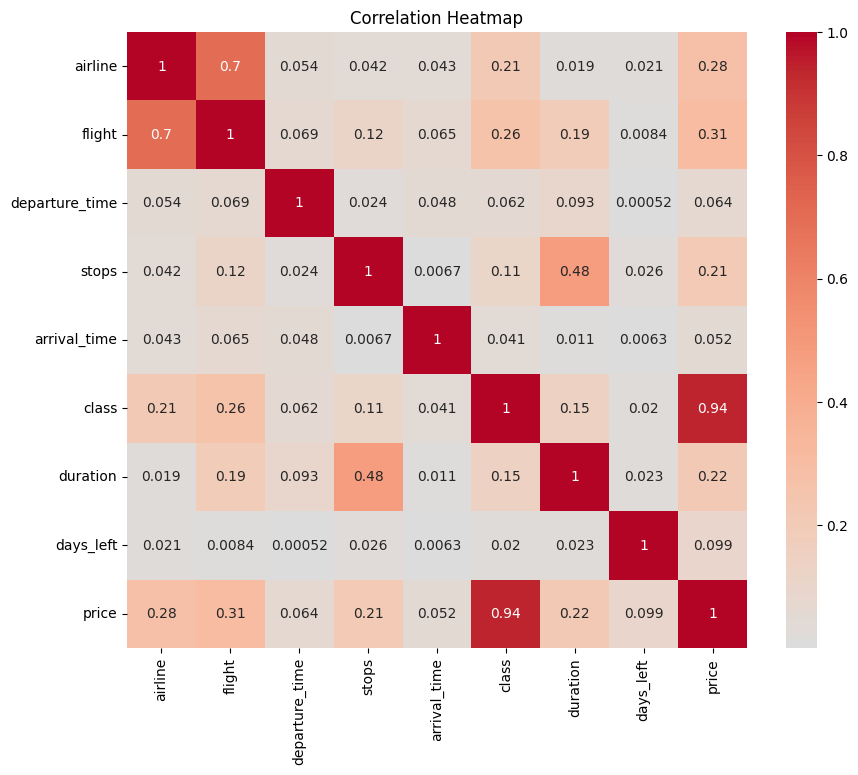

In [28]:

corr_matrix = df.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [40]:
 x_train = df.drop('price', axis=1)
 y_train = df['price'].copy()


In [41]:
scaler = StandardScaler()
x_prep = scaler.fit_transform(x_train)
x_prep

array([[ 1.07981749,  0.86895162, -0.82077563, ...,  0.67121222,
         0.29505292, -0.36397499],
       [ 0.20296139,  0.63541521, -0.25116631, ...,  0.67121222,
        -1.45896727, -1.39349081],
       [ 1.07981749,  0.96059249,  0.88805232, ..., -1.48984177,
        -0.36024903, -1.5405645 ],
       ...,
       [ 1.07981749,  0.92216245, -0.82077563, ...,  0.67121222,
         3.04255014,  0.15078292],
       [-1.5507508 ,  0.32797488, -0.82077563, ...,  0.67121222,
        -0.64089226, -0.80519605],
       [-1.11232275, -0.6032146 , -0.25116631, ..., -1.48984177,
         2.2834102 ,  0.73907768]])

In [42]:
LR_model = LinearRegression()
LR_model.fit(x_prep, y_train)

LinearRegression()

In [43]:
test_data = x_train.sample(5)
test_data

,airline,flight,departure_time,stops,arrival_time,class,duration,days_left
1102,6,1087,2,0,2,0,25.08,36.0
7076,3,447,4,0,0,1,3.92,37.0
7350,6,1194,4,0,2,0,7.58,21.0
11370,1,548,2,0,5,0,6.58,6.0
9933,6,1136,5,2,5,0,2.08,22.0


In [45]:
test_label = y_train.loc[test_data.index]
test_label

1102     45033.0
7076      2874.0
7350     49177.0
11370    80342.0
9933     23898.0
Name: price, dtype: float64

In [76]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_flight_per_room=True):
        self.add_flight_per_room = add_flight_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        flight_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_flight_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, flight_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, flight_per_household, population_per_household]


In [79]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('std_scaler', StandardScaler())  # Standardization
])

In [82]:
X_train_scaled = num_pipeline.fit_transform(x_train)
X_train_scaled

array([[ 1.07981749,  0.86895162, -0.82077563, ...,  0.67121222,
         0.29505292, -0.36397499],
       [ 0.20296139,  0.63541521, -0.25116631, ...,  0.67121222,
        -1.45896727, -1.39349081],
       [ 1.07981749,  0.96059249,  0.88805232, ..., -1.48984177,
        -0.36024903, -1.5405645 ],
       ...,
       [ 1.07981749,  0.92216245, -0.82077563, ...,  0.67121222,
         3.04255014,  0.15078292],
       [-1.5507508 ,  0.32797488, -0.82077563, ...,  0.67121222,
        -0.64089226, -0.80519605],
       [-1.11232275, -0.6032146 , -0.25116631, ..., -1.48984177,
         2.2834102 ,  0.73907768]])

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_flight_per_room = True)),
          ('std_scaler', StandardScaler())
])

In [84]:
X_prepared = num_pipeline.fit_transform(x_train)

<ipython-input-76-7c82e901ddd6>:12: RuntimeWarning: divide by zero encountered in divide
  bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
<ipython-input-76-7c82e901ddd6>:12: RuntimeWarning: invalid value encountered in divide
  bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]


ValueError: ignored